In [1]:
import pandas as pd

In [2]:
folder = 'E:/JuanYu/TrajectoryMining/MyWritting/3-MapMatching/testingdata/testdata/00000000/'
filename = '00000000.track'
track = pd.read_csv(folder+filename, sep='\t', names=['longitude', 'latitude', 'time'])

In [3]:
track.head()

,longitude,latitude,time
0,54.963486,56.251545,1.0
1,54.963207,56.251553,2.0
2,54.962940,56.251560,3.0
3,54.962669,56.251583,4.0
4,54.962395,56.251606,5.0


In [4]:
nodesFilename = '00000000.nodes'
nodes = pd.read_csv(folder+nodesFilename, sep='\t', names=['longitude', 'latitude'])
nodes.head()

,longitude,latitude
0,54.335879,56.117280
1,54.256444,56.081855
2,54.257354,56.081634
3,54.258239,56.081233
4,54.258685,56.083573


In [5]:
arcsFilename = '00000000.arcs'
arcs = pd.read_csv(folder+arcsFilename, sep='\t', names=['starting node', 'ending node'])
arcs.head()

,starting node,ending node
0,0,2433
1,0,2475
2,0,2480
3,1,2
4,1,8408


In [6]:
routeFilename = '00000000.route'
route = pd.read_csv(folder+routeFilename, sep='\t', names=['arc row number'])
route.head()

,arc row number
0,17630
1,17633
2,211
3,17638
4,17645


In [7]:
from shapely.geometry import Point, LineString
import geopandas as gpd

In [8]:
nodes_list = []
for i in range(len(nodes)):
    nodes_list.append(Point(nodes.iloc[i]['longitude'], nodes.iloc[i]['latitude']))
nodes_gpd = gpd.GeoDataFrame(data={'geometry':nodes_list})
nodes_gpd.head()

,geometry
0,POINT (54.33587900000001 56.11728000000001)
1,POINT (54.256444 56.081855)
2,POINT (54.25735400000001 56.08163399999999)
3,POINT (54.258239 56.081233)
4,POINT (54.258685 56.083573)


In [9]:
arcs_list = []
for i in range(len(arcs)):
    p_start = nodes_gpd.iloc[arcs.iloc[i]['starting node']]['geometry']
    p_end = nodes_gpd.iloc[arcs.iloc[i]['ending node']]['geometry']
    arcs_list.append(LineString([p_start, p_end]))
arcs_gpd = gpd.GeoDataFrame(data={'geometry':arcs_list})
arcs_gpd.head()

,geometry
0,LINESTRING (54.33587900000001 56.1172800000000...
1,LINESTRING (54.33587900000001 56.1172800000000...
2,LINESTRING (54.33587900000001 56.1172800000000...
3,"LINESTRING (54.256444 56.081855, 54.2573540000..."
4,"LINESTRING (54.256444 56.081855, 54.25619 56.0..."


In [10]:
track_gpd = gpd.GeoDataFrame(track)
point_list = []
for i in range(len(track)):
    point_list.append(Point(track.iloc[i]['longitude'], track.iloc[i]['latitude']))
track_gpd['geometry'] = point_list

In [11]:
track_gpd.head()

,longitude,latitude,time,geometry
0,54.963486,56.251545,1.0,POINT (54.963486 56.25154499999999)
1,54.963207,56.251553,2.0,POINT (54.963207 56.251553)
2,54.962940,56.251560,3.0,POINT (54.96294 56.25156)
3,54.962669,56.251583,4.0,POINT (54.96266899999999 56.251583)
4,54.962395,56.251606,5.0,POINT (54.96239499999999 56.251606)


(54.20097842770519, 55.01124457229483, 56.06001117770517, 56.27509482229481)

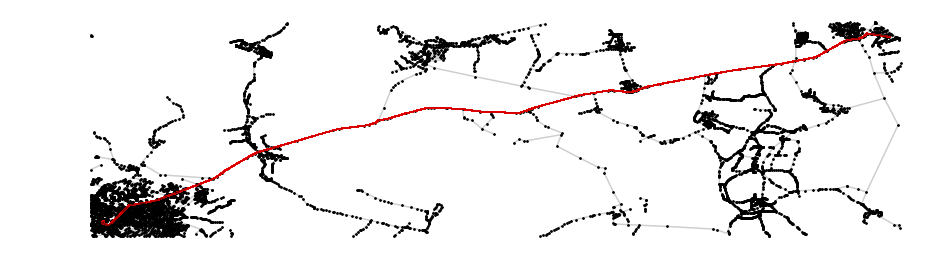

In [12]:
%matplotlib inline
# plotting
ax = arcs_gpd.plot(figsize=(16,14), color='black', alpha=0.1)
nodes_gpd.plot(ax=ax, color='black', marker='o', markersize=3)
track_gpd.plot(ax=ax, color='red', marker='+', markersize=5)
ax.axis('off')

In [34]:
#from shapely.geometry import MultiLineString
line_list = []
for i in range(len(route)):
    line = arcs_gpd.iloc[route.iloc[i]['arc row number']]['geometry']
    #print(line)
    line_list.append(line) #arcs_gpd.iloc[17895]['geometry']
route_lines = gpd.GeoDataFrame(data={'geometry':line_list})
route_lines.head()

,geometry
0,"LINESTRING (54.968545 56.251293, 54.962778 56...."
1,"LINESTRING (54.962778 56.251535, 54.9622439999..."
2,"LINESTRING (54.96224399999999 56.251558, 54.96..."
3,"LINESTRING (54.961159 56.251725, 54.9579300000..."
4,LINESTRING (54.95793000000001 56.2522199999999...


(54.20097842770519, 55.01124457229483, 56.06001117770517, 56.27509482229481)

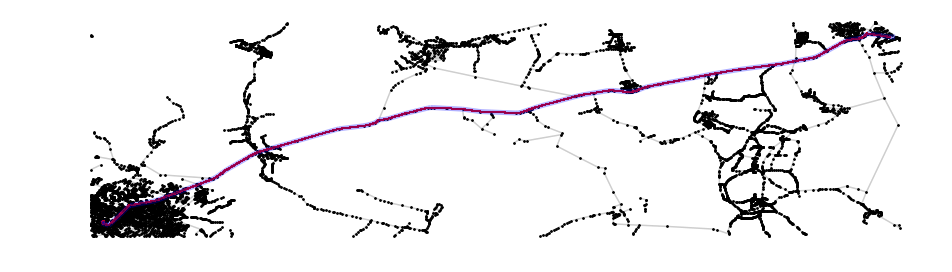

In [36]:
%matplotlib inline
# plotting
ax = arcs_gpd.plot(figsize=(16,14), color='black', alpha=0.1)
nodes_gpd.plot(ax=ax, color='black', marker='o', markersize=3)
track_gpd.plot(ax=ax, color='red', marker='+', markersize=5)
route_lines.plot(ax=ax, color='blue', alpha=0.3, linewidth=5)
ax.axis('off')